In [1]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from Dataset import Dataset
from Setting import Setting

torch.cuda.is_available()

False

# General settings

In [2]:
# Set the random seed for reproducibility.
random_seed = 1
#tf.random.set_random_seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)

args = Setting()
device = args.device
dataset = Dataset(args.dataset_path, args.batch_size, args.fast_testing)

# Ratings histogram

In [3]:
dataframe = dataset.data_full.drop_duplicates(subset=['UserID', 'MovieID', 'Timestamp'])
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,874724710
178269,101,289,7,4,874724727
90841,101,153,0,4,874724754
45079,101,361,10,4,874724781
175466,101,321,0,4,874724843
...,...,...,...,...,...
98754,724,890,0,4,893286638
157460,724,652,0,4,893286638
98345,724,98,0,3,893286638
168106,724,130,7,4,893286638


In [4]:
ratings_counts = dataframe['Rating'].value_counts()
ratings_order = [1, 2, 3, 4, 5] 
ratings_counts = ratings_counts.loc[ratings_order]
df_ratings = pd.DataFrame({'Rating': ratings_order, 'Frequency': ratings_counts.values})
df_ratings['Rating'] = pd.Categorical(df_ratings['Rating'], categories=ratings_order, ordered=True)
dark_green_colors = ['#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
fig = px.bar(
    df_ratings,
    x='Rating',
    y='Frequency',
    color='Rating',
    color_discrete_sequence=dark_green_colors,
    labels={'x': 'Rating', 'y': 'Frequency'},
)
# We add the value for each rating at the top of the bars.
for i, row in df_ratings.iterrows():
    fig.add_annotation(
        x=row['Rating'],
        y=row['Frequency'] + 0.1,
        text=str(row['Frequency']),
        showarrow=False,
        font=dict(color='black', size=12),
        yshift=10
    )
fig.show()

In [5]:
dataset.num_items

1682

# Timestamp convertion to datetime

In [6]:
# Converts timestamp in a DateTime object.
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'], unit='s')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,1997-09-20 03:05:10
178269,101,289,7,4,1997-09-20 03:05:27
90841,101,153,0,4,1997-09-20 03:05:54
45079,101,361,10,4,1997-09-20 03:06:21
175466,101,321,0,4,1997-09-20 03:07:23
...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38
157460,724,652,0,4,1998-04-22 23:10:38
98345,724,98,0,3,1998-04-22 23:10:38
168106,724,130,7,4,1998-04-22 23:10:38


In [7]:
dataframe = dataframe.sort_values(by='Timestamp')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,1997-09-20 03:05:10
178269,101,289,7,4,1997-09-20 03:05:27
90841,101,153,0,4,1997-09-20 03:05:54
45079,101,361,10,4,1997-09-20 03:06:21
175466,101,321,0,4,1997-09-20 03:07:23
...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38
157460,724,652,0,4,1998-04-22 23:10:38
98345,724,98,0,3,1998-04-22 23:10:38
168106,724,130,7,4,1998-04-22 23:10:38


In [8]:
dataframe['Month'] = dataframe['Timestamp'].dt.to_period('M')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38,1998-04
157460,724,652,0,4,1998-04-22 23:10:38,1998-04
98345,724,98,0,3,1998-04-22 23:10:38,1998-04
168106,724,130,7,4,1998-04-22 23:10:38,1998-04


In [9]:
distribution_per_month = dataframe['Month'].value_counts().sort_index()
distribution_per_month

1997-09     6704
1997-10    10304
1997-11    23980
1997-12    11911
1998-01    14095
1998-02    10991
1998-03    12656
1998-04     9359
Freq: M, Name: Month, dtype: int64

In [10]:
dataframe_user_101 = dataframe[dataframe['UserID'] == 101]
dataframe_user_101

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
3723,101,732,7,4,1997-09-20 03:08:02,1997-09
23065,101,1006,4,4,1997-09-20 03:08:02,1997-09
55627,101,60,10,3,1997-09-20 03:08:25,1997-09
181097,101,971,7,4,1997-09-20 03:08:57,1997-09
349,101,140,0,4,1997-09-20 03:09:48,1997-09


# Mean number of rated movies for each user per month

In [11]:
grouped_df = dataframe.groupby(['Month', 'UserID'])
grouped_df

In [12]:
num_ratings_per_user_per_month = grouped_df.size()
num_ratings_per_user_per_month

Month    UserID
1997-09  18        296
         20        106
         34          7
         37        391
         42         53
                  ... 
1998-04  897        16
         908        98
         911       103
         917       127
         926        26
Length: 1485, dtype: int64

In [13]:
grouped_df = dataframe.groupby(['Month', 'UserID'])['MovieID'].count().reset_index()
grouped_df

,Month,UserID,MovieID
0,1997-09,18,296
1,1997-09,20,106
2,1997-09,34,7
3,1997-09,37,391
4,1997-09,42,53
...,...,...,...
1480,1998-04,897,16
1481,1998-04,908,98
1482,1998-04,911,103
1483,1998-04,917,127


In [14]:
result_df = grouped_df.groupby('Month')['MovieID'].agg(['mean', 'std']).reset_index()
result_df

,Month,mean,std
0,1997-09,83.800000,75.027995
1,1997-10,67.789474,62.399761
2,1997-11,83.263889,83.883733
3,1997-12,64.733696,85.745141
4,1998-01,64.360731,93.748358
5,1998-02,63.166667,92.357441
6,1998-03,56.000000,69.459437
7,1998-04,57.771605,83.138683


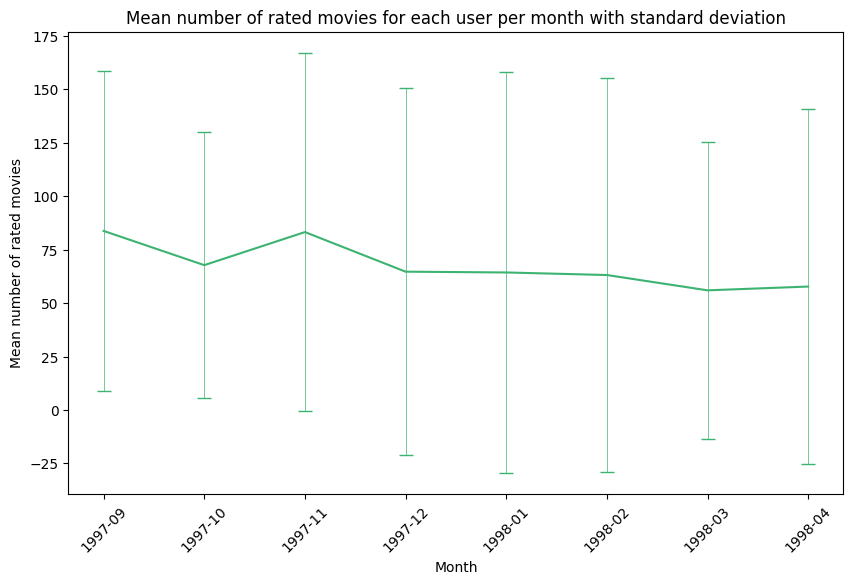

In [15]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    result_df['Month'].astype(str), 
    result_df['mean'], 
    yerr=result_df['std'], 
    capsize=5, 
    color='mediumseagreen',
    elinewidth=0.5
)
plt.xlabel('Month')
plt.ylabel('Mean number of rated movies')
plt.title('Mean number of rated movies for each user per month with standard deviation')
plt.xticks(rotation=45)
plt.show()

In [16]:
mean = np.mean(result_df['mean'].values)
mean

67.61075755297736

# Mean number of rated movies for each user per two months

In [17]:
month_to_time_slot = {
    '01': '[1998-01, 1998-02]', '02': '[1998-01, 1998-02]',
    '03': '[1998-03, 1998-04]', '04': '[1998-03, 1998-04]',
    '09': '[1997-09, 1997-10]', '10': '[1997-09, 1997-10]',
    '11': '[1997-11, 1997-12]', '12': '[1997-11, 1997-12]'
}

In [18]:
dataframe['Month'] = dataframe['Month'].astype(str)
dataframe['TimeSlot'] = dataframe['Month'].str.split('-', expand=True)[1].map(month_to_time_slot)
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp,Month,TimeSlot
474,101,177,4,4,1997-09-20 03:05:10,1997-09,"[1997-09, 1997-10]"
178269,101,289,7,4,1997-09-20 03:05:27,1997-09,"[1997-09, 1997-10]"
90841,101,153,0,4,1997-09-20 03:05:54,1997-09,"[1997-09, 1997-10]"
45079,101,361,10,4,1997-09-20 03:06:21,1997-09,"[1997-09, 1997-10]"
175466,101,321,0,4,1997-09-20 03:07:23,1997-09,"[1997-09, 1997-10]"
...,...,...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38,1998-04,"[1998-03, 1998-04]"
157460,724,652,0,4,1998-04-22 23:10:38,1998-04,"[1998-03, 1998-04]"
98345,724,98,0,3,1998-04-22 23:10:38,1998-04,"[1998-03, 1998-04]"
168106,724,130,7,4,1998-04-22 23:10:38,1998-04,"[1998-03, 1998-04]"


In [19]:
grouped_df = dataframe.groupby(['UserID', 'TimeSlot'])
grouped_df

In [20]:
num_ratings_per_user_per_time_slot = grouped_df.size()
num_ratings_per_user_per_time_slot 

UserID  TimeSlot          
0       [1997-11, 1997-12]     39
1       [1997-11, 1997-12]     67
        [1998-03, 1998-04]     25
2       [1997-11, 1997-12]    128
3       [1997-11, 1997-12]    238
                             ... 
938     [1997-11, 1997-12]     49
939     [1998-01, 1998-02]    142
940     [1997-11, 1997-12]     63
941     [1998-01, 1998-02]     26
942     [1997-09, 1997-10]     22
Length: 1244, dtype: int64

In [21]:
grouped_df = dataframe.groupby(['TimeSlot', 'UserID'])['MovieID'].count().reset_index()
grouped_df

,TimeSlot,UserID,MovieID
0,"[1997-09, 1997-10]",11,223
1,"[1997-09, 1997-10]",12,37
2,"[1997-09, 1997-10]",18,296
3,"[1997-09, 1997-10]",20,108
4,"[1997-09, 1997-10]",22,175
...,...,...,...
1239,"[1998-03, 1998-04]",926,26
1240,"[1998-03, 1998-04]",927,174
1241,"[1998-03, 1998-04]",930,108
1242,"[1998-03, 1998-04]",931,5


In [22]:
result_df = grouped_df.groupby('TimeSlot')['MovieID'].agg(['mean', 'std']).reset_index()
result_df

,TimeSlot,mean,std
0,"[1997-09, 1997-10]",89.515789,77.359925
1,"[1997-11, 1997-12]",89.952381,89.865311
2,"[1998-01, 1998-02]",76.481707,98.362866
3,"[1998-03, 1998-04]",67.324159,80.920351


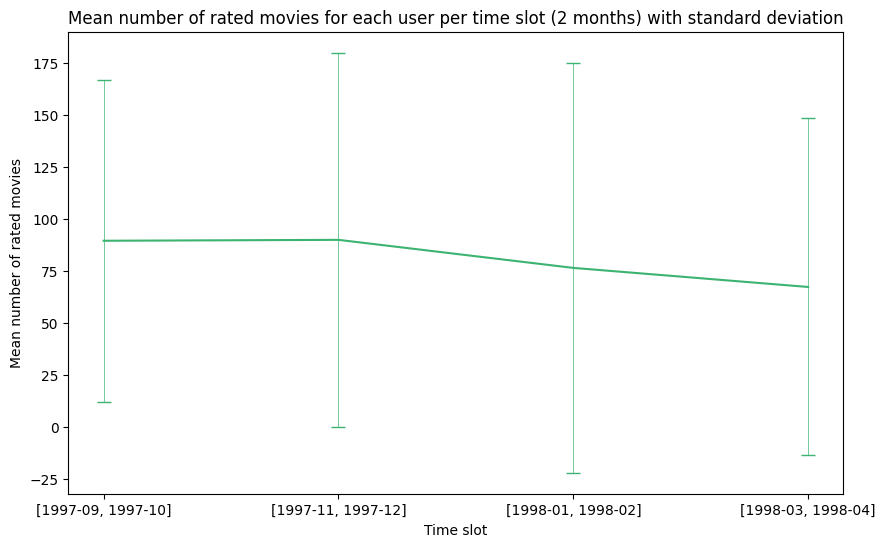

In [23]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    result_df['TimeSlot'].astype(str), 
    result_df['mean'], 
    yerr=result_df['std'], 
    capsize=5, 
    color='mediumseagreen',
    elinewidth=0.5
)
plt.xlabel('Time slot')
plt.ylabel('Mean number of rated movies')
plt.title('Mean number of rated movies for each user per time slot (2 months) with standard deviation')
plt.show()

In [24]:
mean = np.mean(result_df['mean'].values)
mean

80.81850919113627